 ### Predicting Car Prices Using K-nearest Neighbours

In [108]:
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
%matplotlib inline

In [109]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']


In [110]:
cars = pd.read_csv('imports-85.data', names=cols)

In [111]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [112]:
# Select only the columns with continuous values 
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars = cars[continuous_values_cols]


In [113]:
numeric_cars.head(10)

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450
5,?,99.8,177.3,66.3,53.1,2507,3.19,3.40,8.5,110,5500,19,25,15250
6,158,105.8,192.7,71.4,55.7,2844,3.19,3.40,8.5,110,5500,19,25,17710
7,?,105.8,192.7,71.4,55.7,2954,3.19,3.40,8.5,110,5500,19,25,18920
8,158,105.8,192.7,71.4,55.9,3086,3.13,3.40,8.3,140,5500,17,20,23875
9,?,99.5,178.2,67.9,52.0,3053,3.13,3.40,7.0,160,5500,16,22,?


 #### data cleaning

In [114]:
numeric_cars.dtypes

normalized-losses     object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
bore                  object
stroke                object
compression-rate     float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [115]:
numeric_cars=numeric_cars.replace('?',np.nan)

numeric_cars

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.00,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.00,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.00,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.00,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.00,115,5500,18,22,17450
5,NaN,99.8,177.3,66.3,53.1,2507,3.19,3.40,8.50,110,5500,19,25,15250
6,158,105.8,192.7,71.4,55.7,2844,3.19,3.40,8.50,110,5500,19,25,17710
7,NaN,105.8,192.7,71.4,55.7,2954,3.19,3.40,8.50,110,5500,19,25,18920
8,158,105.8,192.7,71.4,55.9,3086,3.13,3.40,8.30,140,5500,17,20,23875
9,NaN,99.5,178.2,67.9,52.0,3053,3.13,3.40,7.00,160,5500,16,22,NaN


In [116]:
numeric_cars.dtypes

normalized-losses     object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
bore                  object
stroke                object
compression-rate     float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [117]:
numeric_cars=numeric_cars.astype('float')
numeric_cars.dtypes

normalized-losses    float64
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight          float64
bore                 float64
stroke               float64
compression-rate     float64
horsepower           float64
peak-rpm             float64
city-mpg             float64
highway-mpg          float64
price                float64
dtype: object

In [118]:
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [119]:
#clean missing values in normalised losses column
mean_losses=numeric_cars["normalized-losses"].mean()
numeric_cars['normalized-lossed']=numeric_cars['normalized-losses'].replace(np.nan,mean_losses)

In [120]:
columns_w_missing=['normalized-losses','bore','stroke','horsepower','peak-rpm','price']


def clean_missing(df,cols):
    for each in cols:
        
        mean_others=df[each].mean()
        df[each]=df[each].replace(np.nan,mean_others)
  
    return print('missing values cleaned')




In [121]:
clean_missing(numeric_cars,columns_w_missing)

missing values cleaned


In [122]:
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
normalized-lossed    0
dtype: int64

In [123]:
# Normalize all columnns to range from 0 to 1 except the target column.
price_col = numeric_cars['price']
numeric_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())
numeric_cars['price'] = price_col

In [124]:
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price,normalized-lossed
0,0.298429,0.058309,0.413433,0.316667,0.083333,0.411171,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,13495.0,0.298429
1,0.298429,0.058309,0.413433,0.316667,0.083333,0.411171,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,16500.0,0.298429
2,0.298429,0.230321,0.449254,0.433333,0.383333,0.517843,0.100000,0.666667,0.1250,0.441667,0.346939,0.166667,0.263158,16500.0,0.298429
3,0.518325,0.384840,0.529851,0.491667,0.541667,0.329325,0.464286,0.633333,0.1875,0.225000,0.551020,0.305556,0.368421,13950.0,0.518325
4,0.518325,0.373178,0.529851,0.508333,0.541667,0.518231,0.464286,0.633333,0.0625,0.279167,0.551020,0.138889,0.157895,17450.0,0.518325


#### model

In [125]:
def knn_train_test(train_col,target_col,df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
    
    # shuffle orders of rows
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # divide number of rows in half and round
    last_train_row = int(len(rand_df) / 2)
    
    # train test set split
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    # fit using default k
    knn.fit(train_df[[train_col]], train_df[target_col])
    
    # make predictions using model
    predictions = knn.predict(test_df[[train_col]])

    # calculate and return rmse.
    mse = mean_squared_error(test_df[target_col], predictions)
    rmse = np.sqrt(mse)
    return rmse

In [126]:
price=numeric_cars['price']
train_cols = numeric_cars.columns.drop('price')


In [127]:
rmse_values={}
for col in train_cols:
    rmse=knn_train_test(col,'price',numeric_cars)
    rmse_values[col]=rmse
    

In [128]:
print(rmse_values)

{'height': 7832.152832500197, 'city-mpg': 5085.0471938761675, 'peak-rpm': 7965.54170513815, 'wheel-base': 5743.8770860517825, 'normalized-losses': 7374.513274367573, 'horsepower': 5092.272401434547, 'stroke': 8096.65389823726, 'length': 5418.778300690459, 'width': 5030.139338284197, 'highway-mpg': 4245.734566600798, 'bore': 6746.031650636273, 'normalized-lossed': 7374.513274367573, 'curb-weight': 4436.523561278551, 'compression-rate': 7177.202060550313}


In [129]:
def knn_train_test(train_col, target_col, df):
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [1,3,5,7,9]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[train_col]], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[[train_col]])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

In [130]:
k_results={}

In [131]:
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', numeric_cars)
    k_results[col] = rmse_val

k_results

{'height': {1: 10653.050778292903, 3: 8176.934988463841, 9: 7632.665665042622, 5: 7832.152832500197, 7: 7743.870132519971}, 'city-mpg': {1: 6449.848972168971, 3: 4808.843642391777, 9: 5021.788908379828, 5: 5085.0471938761675, 7: 4958.158653064454}, 'peak-rpm': {1: 9386.46161279999, 3: 8096.1146568480835, 9: 8101.58286959599, 5: 7965.54170513815, 7: 8256.807774278761}, 'wheel-base': {1: 5400.51418967299, 3: 5629.538534558065, 9: 6360.529322830884, 5: 5743.8770860517825, 7: 6048.744597831812}, 'normalized-losses': {1: 6998.7424709166335, 3: 7038.210876329459, 9: 7507.512182575815, 5: 7374.513274367573, 7: 7722.670399388631}, 'horsepower': {1: 5261.091645623908, 3: 4995.302906280692, 9: 4989.9865689273765, 5: 5092.272401434547, 7: 5025.308887429083}, 'stroke': {1: 7345.451363903154, 3: 7455.212313651712, 9: 8066.594604492951, 5: 8096.65389823726, 7: 7935.188913776914}, 'length': {1: 6853.715819594109, 3: 5113.209767682691, 9: 5641.426309574451, 5: 5418.778300690459, 7: 5618.149068803402},

In [146]:
k_key=list(k_results.values()).
k_key

TypeError: unorderable types: dict() < dict()

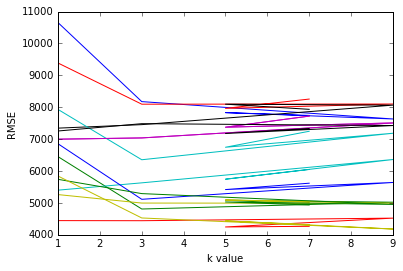

In [148]:
for k,v in k_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')
    

 #### Multivariate model

In [140]:
feature_avg_rmse = {}
for k,v in k_results.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
series_avg_rmse = pd.Series(feature_avg_rmse)
series_avg_rmse.sort_values()

highway-mpg          4384.386989
curb-weight          4661.537320
horsepower           5072.792482
width                5189.360872
city-mpg             5264.737474
length               5729.055853
wheel-base           5836.640746
bore                 7092.318813
normalized-lossed    7328.329841
normalized-losses    7328.329841
compression-rate     7335.788011
stroke               7779.820219
peak-rpm             8361.301724
height               8407.734879
dtype: float64

In [149]:
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    # Randomize order of rows
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # train test split
    last_train_row = int(len(rand_df) / 2)
    

    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [5]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        # Make predictions using model
        predicted_labels = knn.predict(test_df[train_cols])

        # MSE and RMSE calculation
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

In [151]:
k_rmse_results = {}

In [152]:
two_best_features = ['highway-mpg', 'curb-weight']
rmse_val = knn_train_test(two_best_features, 'price', numeric_cars)
k_rmse_results["two best features"] = rmse_val

In [153]:
three_best_features = ['highway-mpg', 'curb-weight','horsepower']
rmse_val = knn_train_test(three_best_features, 'price', numeric_cars)
k_rmse_results["three best features"] = rmse_val

In [154]:
four_best_features = ['highway-mpg', 'curb-weight','horsepower','width']
rmse_val = knn_train_test(four_best_features, 'price', numeric_cars)
k_rmse_results["four best features"] = rmse_val


In [155]:
five_best_features = ['highway-mpg', 'curb-weight','horsepower','width','city-mpg']
rmse_val = knn_train_test(five_best_features, 'price', numeric_cars)
k_rmse_results["five best features"] = rmse_val

In [156]:
six_best_features = ['highway-mpg', 'curb-weight','horsepower','width','city-mpg','length']
rmse_val = knn_train_test(six_best_features, 'price', numeric_cars)
k_rmse_results["six best features"] = rmse_val


In [157]:
k_rmse_results

{'two best features': {5: 3820.2253486903005}, 'four best features': {5: 4258.304607896109}, 'five best features': {5: 4053.975733555753}, 'six best features': {5: 3796.654352070254}, 'three best features': {5: 3864.7143872599117}}

In [167]:
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    # Randomize order of rows 
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # remember to round the number 
    last_train_row = int(len(rand_df) / 2)
    
    #train test set split
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [i for i in range(1, 25)]
    k_rmses = {}
    
    for k in k_values:
        # Fit model 
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        # Make predictions using model
        predicted_labels = knn.predict(test_df[train_cols])

        # MSE and RMSE calculations
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses


In [168]:
k_rmse_results2 = {}

In [169]:
two_best_features = ['highway-mpg', 'curb-weight']
rmse_val = knn_train_test(two_best_features, 'price', numeric_cars)
k_rmse_results2["two best features"] = rmse_val

In [170]:
three_best_features = ['highway-mpg', 'curb-weight','horsepower']
rmse_val = knn_train_test(three_best_features, 'price', numeric_cars)
k_rmse_results2["three best features"] = rmse_val

In [171]:
four_best_features = ['highway-mpg', 'curb-weight','horsepower','width']
rmse_val = knn_train_test(four_best_features, 'price', numeric_cars)
k_rmse_results2["four best features"] = rmse_val


In [172]:
five_best_features = ['highway-mpg', 'curb-weight','horsepower','width','city-mpg']
rmse_val = knn_train_test(five_best_features, 'price', numeric_cars)
k_rmse_results2["five best features"] = rmse_val

In [173]:
six_best_features = ['highway-mpg', 'curb-weight','horsepower','width','city-mpg','length']
rmse_val = knn_train_test(six_best_features, 'price', numeric_cars)
k_rmse_results2["six best features"] = rmse_val


In [174]:
k_rmse_results2

{'two best features': {1: 4469.809924247531, 2: 4150.696507458633, 3: 3987.9891626272856, 4: 3954.5066251774333, 5: 3820.2253486903005, 6: 3802.877218136884, 7: 3825.1326072315655, 8: 3815.9297349059752, 9: 3923.7159927651383, 10: 4114.50348106246, 11: 4221.6225114338, 12: 4326.151866605607, 13: 4442.775308741222, 14: 4540.333391812839, 15: 4599.611325323972, 16: 4697.432994259506, 17: 4701.926516916978, 18: 4730.548039363689, 19: 4772.357905165295, 20: 4809.441994104417, 21: 4869.813896352592, 22: 4903.675608120018, 23: 4951.892898462238, 24: 5023.0541108693815}, 'four best features': {1: 3966.2712856381304, 2: 3190.4235782816436, 3: 3773.0188415277366, 4: 4039.306052770511, 5: 4258.304607896109, 6: 4211.717469756601, 7: 4064.6099202534715, 8: 4064.180591489108, 9: 4144.286274465112, 10: 4262.100448793342, 11: 4343.254661977325, 12: 4427.1068150587225, 13: 4488.695733540047, 14: 4526.793389218437, 15: 4454.215591754103, 16: 4456.914298300337, 17: 4501.817986951914, 18: 4581.3987604518

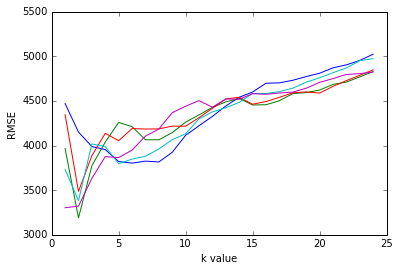

In [175]:
for k,v in k_rmse_results2.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')